<a href="https://colab.research.google.com/github/Jefferson-Garay/Predicion-de-Eliminatorias-Futbol-Combebol/blob/main/IA_MODELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset

In [ ]:
cd drive/MyDrive/IA_PARTIDO

/content/drive/MyDrive/IA_PARTIDO


In [ ]:
ls

IA_MODELO.ipynb  mundial.xlsx


In [ ]:
Data=pd.read_excel('mundial.xlsx',sheet_name='Hoja1')
Data

,fecha,hora (UTC-3),round,dia,condicion,resultado,oponente,msnm,ranking FIFA,remates,...,tiros de penal anotados,faltas,tarjetas amarillas,tarjetas rojas,tiros de esquina,precision de pases,Probabilidad de apuesta,posesion,mundial,equipo
0,2023-09-07,17:30:00,Jornada 1,Jueves,local,D,Perú,220.0,48.0,19,...,NaN,19,0,0,11,0.85,0.505,0.600,EEUU,Paraguay
1,2023-09-07,19:00:00,Jornada 1,Jueves,local,W,Ecuador,25.0,1.0,13,...,NaN,9,1,0,4,0.87,0.775,0.710,EEUU,Argentina
2,2023-09-07,19:45:00,Jornada 1,Jueves,local,W,Bolivia,10.0,3.0,21,...,NaN,6,1,0,6,0.92,1.000,0.800,EEUU,Brasil
3,2023-09-08,18:00:00,Jornada 1,Viernes,local,W,Chile,26.0,16.0,18,...,NaN,17,4,0,3,0.80,0.599,0.510,EEUU,Uruguay
4,2023-09-08,18:00:00,Jornada 1,Viernes,local,W,Venezuela,18.0,17.0,13,...,NaN,13,0,0,2,0.87,0.746,0.710,EEUU,Colombia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2017-10-10,NaN,Jornada 18,Martes,visitante,L,Uruguay,50.0,NaN,3,...,NaN,8,1,0,2,NaN,NaN,0.437,Rusia 2018,Bolivia
494,2017-10-10,NaN,Jornada 18,Martes,visitante,W,Paraguay,102.0,NaN,7,...,NaN,21,4,1,2,NaN,NaN,0.419,Rusia 2018,Venezuela
495,2017-10-10,NaN,Jornada 18,martes,visitante,D,Ecuador,NaN,NaN,6,...,NaN,17,3,0,9,NaN,NaN,0.454,Rusia 2018,Argentina
496,2017-10-10,NaN,Jornada 18,martes,visitante,D,Perú,NaN,NaN,7,...,NaN,16,0,0,2,NaN,NaN,0.339,Rusia 2018,Colombia


# Exploración de datos

## Datos perdidos

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fecha                    498 non-null    datetime64[ns]
 1   hora (UTC-3)             140 non-null    object        
 2   round                    498 non-null    object        
 3   dia                      498 non-null    object        
 4   condicion                498 non-null    object        
 5   resultado                498 non-null    object        
 6   oponente                 498 non-null    object        
 7   msnm                     389 non-null    float64       
 8   ranking FIFA             318 non-null    float64       
 9   remates                  498 non-null    int64         
 10  remates al arco          498 non-null    int64         
 11  tiros libres             498 non-null    int64         
 12  tiros penal              0 non-null 

## Eliminar columnas vacias

In [ ]:
Data= Data.drop ('tiros penal', axis = 1)

In [ ]:
Data= Data.drop ('tiros de penal anotados', axis = 1)

In [ ]:
Data= Data.drop ('hora (UTC-3)', axis = 1)

In [ ]:
Data= Data.drop ('precision de pases', axis = 1)

In [ ]:
Data= Data.drop ('Probabilidad de apuesta', axis = 1)

In [ ]:
Data= Data.drop ('msnm', axis = 1)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               498 non-null    datetime64[ns]
 1   round               498 non-null    object        
 2   dia                 498 non-null    object        
 3   condicion           498 non-null    object        
 4   resultado           498 non-null    object        
 5   oponente            498 non-null    object        
 6   ranking FIFA        318 non-null    float64       
 7   remates             498 non-null    int64         
 8   remates al arco     498 non-null    int64         
 9   tiros libres        498 non-null    int64         
 10  faltas              498 non-null    int64         
 11  tarjetas amarillas  498 non-null    int64         
 12  tarjetas rojas      498 non-null    int64         
 13  tiros de esquina    498 non-null    int64         

## Limpieza de variables

In [ ]:
Data.equipo.value_counts()

,count
equipo,
Paraguay,51
Uruguay,51
Venezuela,50
Brasil,48
Perú,48
Ecuador,48
Chile,47
Bolivia,45
Colombia,43


CORRECCIÓN DE EQUIPO

In [ ]:
Data[Data.equipo == "Argentina"]
Data.loc[Data['equipo'] == 'Argentina ', 'equipo'] = 'Argentina'


In [ ]:
Data[Data.equipo == "Chile"]
Data.loc[Data['equipo'] == 'chie', 'equipo'] = 'Chile'

In [ ]:
Data[Data.equipo == "Chile"]
Data.loc[Data['equipo'] == 'chile', 'equipo'] = 'Chile'

In [ ]:
Data[Data.equipo == "Bolivia"]
Data.loc[Data['equipo'] == 'Bolivia ', 'equipo'] = 'Bolivia'

In [ ]:
Data[Data.equipo == "Colombia"]
Data.loc[Data['equipo'] == 'Colombia ', 'equipo'] = 'Colombia'

In [ ]:
Data = Data.rename(columns={'tiros libres ': 'tiros libres'})

CORRECCIÓN OPONENTE

In [ ]:
Data[Data.oponente == "Colombia"]
Data.loc[Data['oponente'] == 'Colombia ', 'oponente'] = 'Colombia'

In [ ]:
Data[Data.oponente == "Chile"]
Data.loc[Data['oponente'] == 'chie', 'oponente'] = 'Chile'

In [ ]:
Data[Data.oponente == "Chile"]
Data.loc[Data['oponente'] == 'chile', 'oponente'] = 'Chile'

In [ ]:
Data[Data.oponente == "Argentina"]
Data.loc[Data['oponente'] == 'Argentina ', 'oponente'] = 'Argentina'

In [ ]:
Data[Data.oponente == "Bolivia"]
Data.loc[Data['oponente'] == 'Bolivia ', 'oponente'] = 'Bolivia'

In [ ]:
Data['oponente'].value_counts()

,count
oponente,
Paraguay,51
Bolivia,51
Uruguay,51
Perú,50
Ecuador,50
Brasil,50
Chile,49
Venezuela,49
Colombia,49


In [ ]:
Data[Data.equipo == "Argentina"]

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,faltas,tarjetas amarillas,tarjetas rojas,tiros de esquina,posesion,mundial,equipo
1,2023-09-07,Jornada 1,Jueves,local,W,Ecuador,1.0,13,4,13,9,1,0,4,0.710,EEUU,Argentina
13,2023-10-12,Jornada 3,Jueves,local,W,Paraguay,1.0,15,4,22,10,1,0,9,0.750,EEUU,Argentina
24,2023-11-16,Jornada 5,Jueves,local,L,Uruguay,1.0,12,3,24,11,4,0,8,0.640,EEUU,Argentina
33,2024-09-05,Jornada 7,Jueves,local,W,Chile,1.0,16,8,13,8,2,0,4,0.650,EEUU,Argentina
49,2024-10-15,Jornada 10,Martes,local,W,Bolivia,1.0,14,10,10,10,0,0,4,0.730,EEUU,Argentina
56,2024-11-19,Jornada 12,Martes,local,W,Perú,1.0,11,3,20,10,0,0,2,0.740,EEUU,Argentina
67,2025-03-25,Jornada 14,Martes,local,W,Brasil,1.0,12,7,19,12,5,0,6,0.560,EEUU,Argentina
75,2023-09-12,Jornada 2,Martes,visitante,W,Bolivia,1.0,15,8,23,10,0,0,4,0.600,EEUU,Argentina
87,2023-10-17,Jornada 4,Martes,visitante,W,Perú,1.0,10,6,21,10,0,0,1,0.660,EEUU,Argentina
99,2023-11-21,Jornada 6,Martes,visitante,W,Brasil,1.0,8,2,25,16,0,0,3,0.510,EEUU,Argentina


In [ ]:
Data.isnull().sum()
# ranking fifa no se va a considerar

,0
fecha,0
round,0
dia,0
condicion,0
resultado,0
oponente,0
ranking FIFA,180
remates,0
remates al arco,0
tiros libres,0


## Proporcion de clases

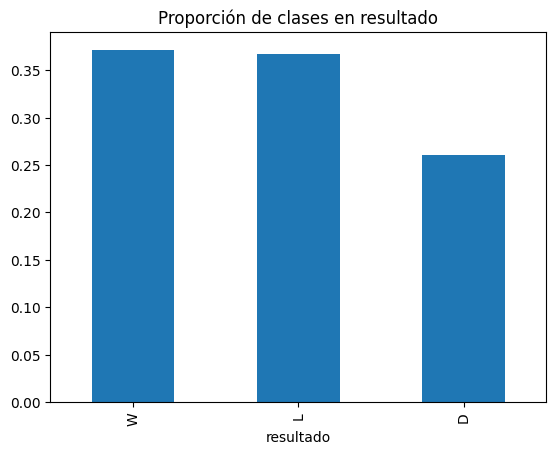

In [ ]:
(Data.resultado.value_counts() / len(Data)).plot(kind='bar', title='Proporción de clases en resultado')
plt.show()

# Preparacion de variables categoricas

In [ ]:
Data["condicion_code"]=Data["condicion"].astype('category').cat.codes #0=local, 1=visitante

In [ ]:
Data["oponente_code"]=Data["oponente"].astype('category').cat.codes #0=local, 1=visitante

In [ ]:
Data["dia_code"] = Data["fecha"].dt.dayofweek

In [ ]:
Data

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,faltas,tarjetas amarillas,tarjetas rojas,tiros de esquina,posesion,mundial,equipo,condicion_code,oponente_code,dia_code
0,2023-09-07,Jornada 1,Jueves,local,D,Perú,48.0,19,6,13,19,0,0,11,0.600,EEUU,Paraguay,2,7,3
1,2023-09-07,Jornada 1,Jueves,local,W,Ecuador,1.0,13,4,13,9,1,0,4,0.710,EEUU,Argentina,2,5,3
2,2023-09-07,Jornada 1,Jueves,local,W,Bolivia,3.0,21,11,17,6,1,0,6,0.800,EEUU,Brasil,2,1,3
3,2023-09-08,Jornada 1,Viernes,local,W,Chile,16.0,18,7,16,17,4,0,3,0.510,EEUU,Uruguay,2,3,4
4,2023-09-08,Jornada 1,Viernes,local,W,Venezuela,17.0,13,4,21,13,0,0,2,0.710,EEUU,Colombia,2,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2017-10-10,Jornada 18,Martes,visitante,L,Uruguay,NaN,3,2,10,8,1,0,2,0.437,Rusia 2018,Bolivia,3,8,1
494,2017-10-10,Jornada 18,Martes,visitante,W,Paraguay,NaN,7,5,19,21,4,1,2,0.419,Rusia 2018,Venezuela,3,6,1
495,2017-10-10,Jornada 18,martes,visitante,D,Ecuador,NaN,6,2,19,17,3,0,9,0.454,Rusia 2018,Argentina,3,5,1
496,2017-10-10,Jornada 18,martes,visitante,D,Perú,NaN,7,5,18,16,0,0,2,0.339,Rusia 2018,Colombia,3,7,1


# Preparacion de variable target: Resultado
Se codifica como un vector one-hot para hacer una clasificacion multiclase donde (W: WIN, D: DRAW, L: LOST)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(Data.resultado)
lb.classes_
target=lb.transform(Data.resultado)

In [ ]:
print(target)

[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [0 1 0]]


Cuantos partidos se jugaron por año en los procesos de eliminatoras

In [ ]:
# Agregamos una columna con el año
Data['anio'] = Data['fecha'].dt.year

# Contamos las observaciones por año
conteo_por_año = Data['anio'].value_counts().sort_index()

In [ ]:
conteo_por_año

,count
anio,
2015,40
2016,80
2017,60
2020,40
2021,98
2022,40
2023,60
2024,60
2025,20


# Creacion de modelo base (punto de partida - no ejecutar)

In [ ]:
X_train=Data[Data['fecha']<'2024-01-01']
X_test=Data[Data['fecha']>='2025-01-01']

In [ ]:
print(X_train.shape)
print(X_test.shape)

(418, 21)
(20, 21)


In [ ]:
y_train = lb.transform(X_train.resultado)
y_test = lb.transform(X_test.resultado)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(418, 3)
(20, 3)


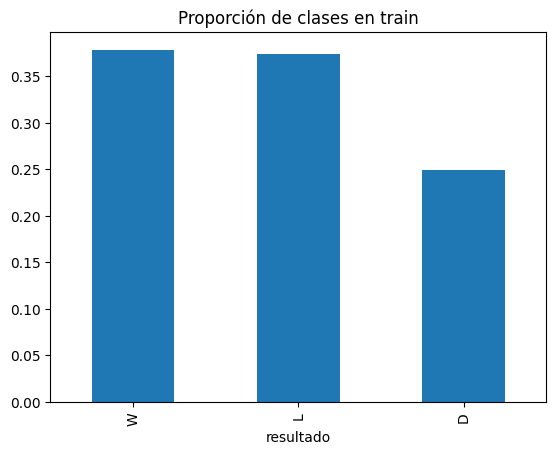

In [ ]:
(X_train.resultado.value_counts() / len(X_train)).plot(kind='bar', title='Proporción de clases en train')
plt.show()

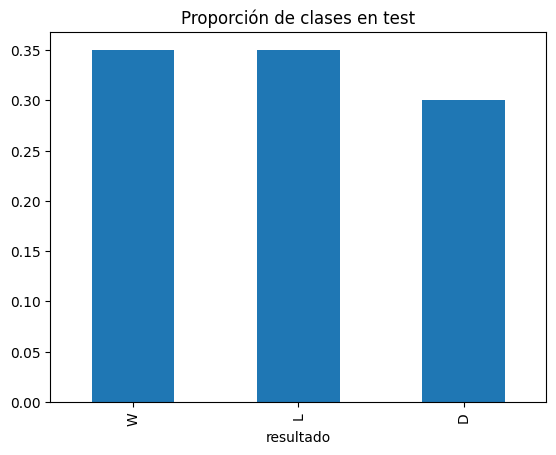

In [ ]:
(X_test.resultado.value_counts() / len(X_test)).plot(kind='bar', title='Proporción de clases en test')
plt.show()

In [ ]:
predictores=["condicion_code","dia_code","oponente_code"]

## Preparacion de variables numericas

In [ ]:
Data.sample(5)

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,tarjetas amarillas,tarjetas rojas,tiros de esquina,posesion,mundial,equipo,condicion_code,oponente_code,dia_code,anio
50,2024-11-14,Jornada 11,Jueves,local,D,Brasil,44.0,12,5,14,...,4,1,3,0.330,EEUU,Venezuela,2,2,3,2024
168,2021-09-05,Jornada 6,Domingo,local,W,Venezuela,21.0,13,5,4,...,2,0,3,0.518,QATAR,Perú,2,9,6,2021
362,2016-10-06,Jornada 9,Jueves,local,W,Bolivia,NaN,14,10,12,...,1,0,3,0.713,Rusia 2018,Brasil,2,1,3,2016
292,2021-11-12,Jornada 13,Viernes,Visitante,W,Uruguay,8.0,7,3,5,...,1,0,2,0.643,QATAR,Argentina,1,8,4,2021
169,2021-06-03,Jornada 7,Jueves,local,W,Venezuela,75.0,18,7,6,...,3,0,6,0.528,QATAR,Bolivia,2,9,3,2021


In [ ]:
partidos_agrupados=Data.groupby("equipo")

In [ ]:
partidos_agrupados

Agrupamos el dataset para ordenar los partidos por seleccion

In [ ]:
grupo=partidos_agrupados.get_group("Argentina")

In [ ]:
grupo

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,tarjetas amarillas,tarjetas rojas,tiros de esquina,posesion,mundial,equipo,condicion_code,oponente_code,dia_code,anio
1,2023-09-07,Jornada 1,Jueves,local,W,Ecuador,1.0,13,4,13,...,1,0,4,0.710,EEUU,Argentina,2,5,3,2023
13,2023-10-12,Jornada 3,Jueves,local,W,Paraguay,1.0,15,4,22,...,1,0,9,0.750,EEUU,Argentina,2,6,3,2023
24,2023-11-16,Jornada 5,Jueves,local,L,Uruguay,1.0,12,3,24,...,4,0,8,0.640,EEUU,Argentina,2,8,3,2023
33,2024-09-05,Jornada 7,Jueves,local,W,Chile,1.0,16,8,13,...,2,0,4,0.650,EEUU,Argentina,2,3,3,2024
49,2024-10-15,Jornada 10,Martes,local,W,Bolivia,1.0,14,10,10,...,0,0,4,0.730,EEUU,Argentina,2,1,1,2024
56,2024-11-19,Jornada 12,Martes,local,W,Perú,1.0,11,3,20,...,0,0,2,0.740,EEUU,Argentina,2,7,1,2024
67,2025-03-25,Jornada 14,Martes,local,W,Brasil,1.0,12,7,19,...,5,0,6,0.560,EEUU,Argentina,2,2,1,2025
75,2023-09-12,Jornada 2,Martes,visitante,W,Bolivia,1.0,15,8,23,...,0,0,4,0.600,EEUU,Argentina,3,1,1,2023
87,2023-10-17,Jornada 4,Martes,visitante,W,Perú,1.0,10,6,21,...,0,0,1,0.660,EEUU,Argentina,3,7,1,2023
99,2023-11-21,Jornada 6,Martes,visitante,W,Brasil,1.0,8,2,25,...,0,0,3,0.510,EEUU,Argentina,3,2,1,2023


Ordenamos por fecha

In [ ]:
grupo.sort_values("fecha")

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,tarjetas amarillas,tarjetas rojas,tiros de esquina,posesion,mundial,equipo,condicion_code,oponente_code,dia_code,anio
322,2015-10-08,Jornada 1,Jueves,local,L,Ecuador,NaN,13,6,25,...,3,0,7,0.674,Rusia 2018,Argentina,2,5,3,2015
412,2015-10-08,Jornada 1,Jueves,visitante,L,Ecuador,NaN,13,6,25,...,3,0,7,0.674,Rusia 2018,Argentina,3,5,3,2015
414,2015-10-13,Jornada 2,Martes,visitante,D,Paraguay,NaN,12,6,20,...,2,0,1,0.611,Rusia 2018,Argentina,3,6,1,2015
331,2015-11-13,Jornada 3,Viernes,local,D,Brasil,NaN,12,5,21,...,3,0,11,0.485,Rusia 2018,Argentina,2,2,4,2015
426,2015-11-17,Jornada 4,martes,visitante,W,Colombia,NaN,5,2,20,...,3,0,1,0.463,Rusia 2018,Argentina,3,4,1,2015
430,2016-03-24,Jornada 5,jueves,visitante,W,Chile,NaN,8,3,13,...,4,0,4,0.454,Rusia 2018,Argentina,3,3,3,2016
346,2016-03-29,Jornada 6,martes,local,W,Bolivia,NaN,18,9,20,...,0,0,4,0.799,Rusia 2018,Argentina,2,1,1,2016
348,2016-09-01,Jornada 7,Jueves,local,W,Uruguay,NaN,2,2,23,...,1,1,7,0.557,Rusia 2018,Argentina,2,8,3,2016
447,2016-09-06,Jornada 8,martes,visitante,D,Venezuela,NaN,12,7,13,...,3,0,8,0.694,Rusia 2018,Argentina,3,9,1,2016
450,2016-10-06,Jornada 9,Jueves,visitante,D,Perú,NaN,8,6,13,...,4,0,9,0.554,Rusia 2018,Argentina,3,7,3,2016


## Importancia de variables

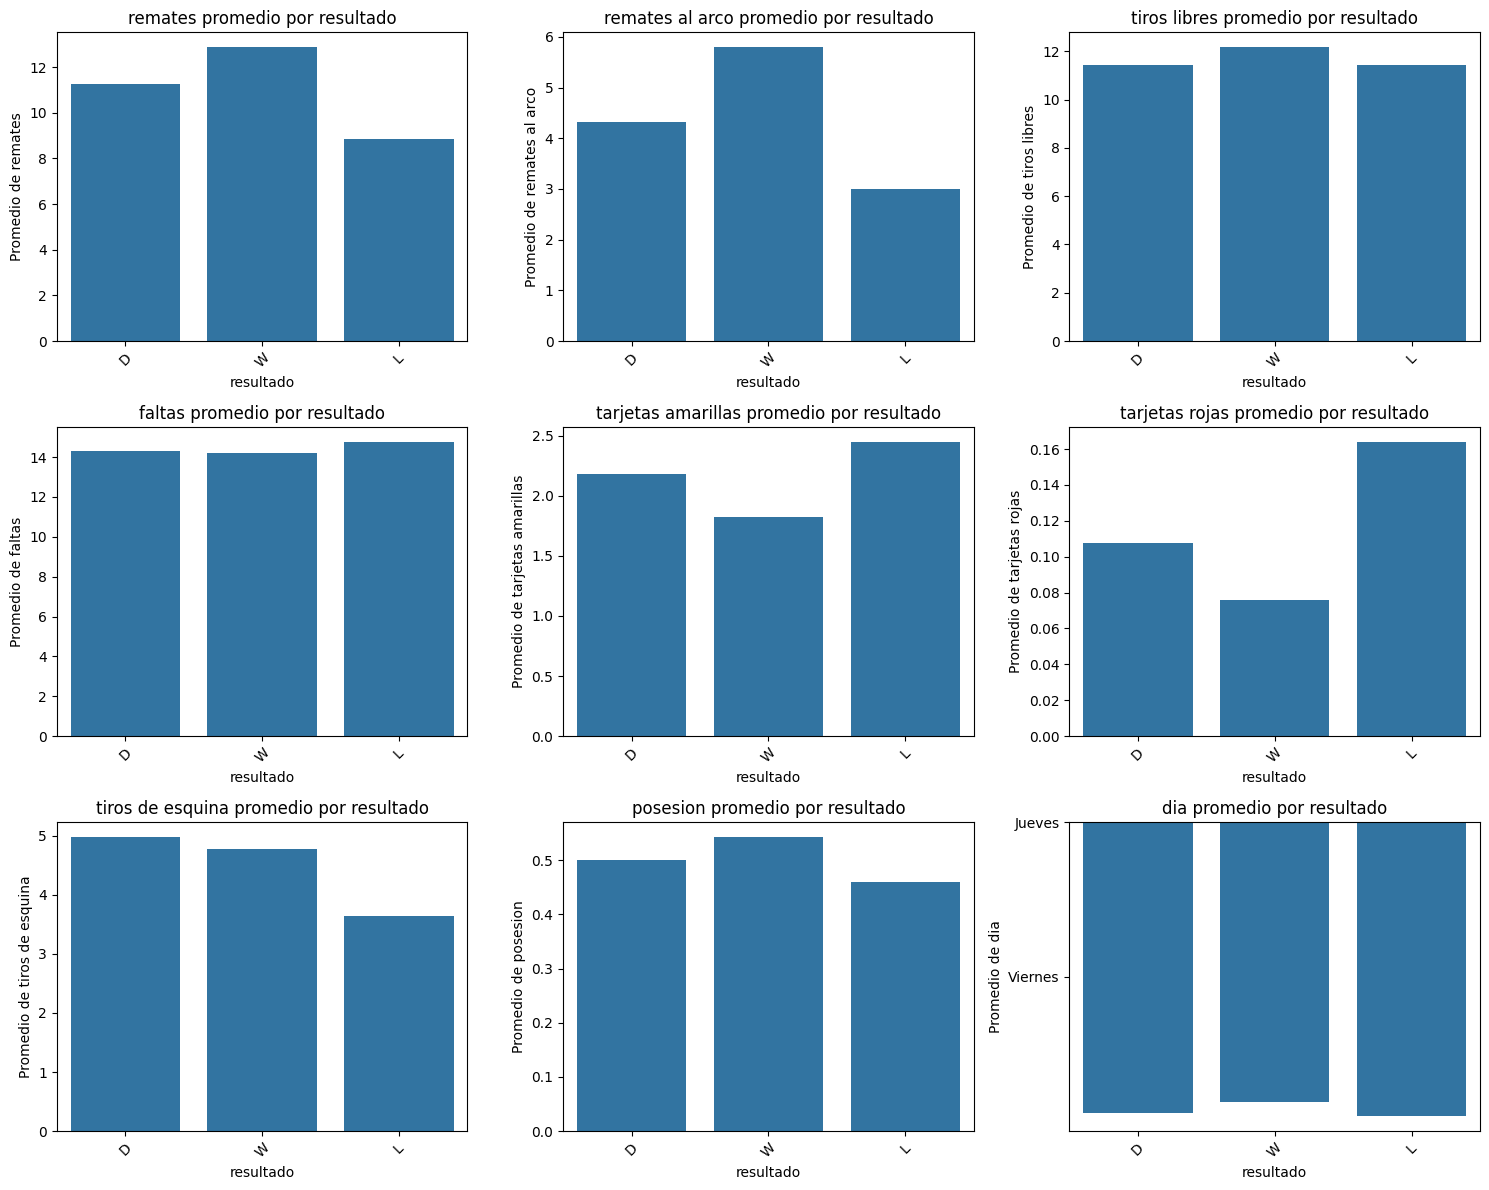

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_vars = ["remates", "remates al arco", "tiros libres",
                     "faltas", "tarjetas amarillas",
                     "tarjetas rojas", "tiros de esquina",
                     "posesion", "dia"]

target_var = 'resultado'

# Crear subplots
n_vars = len(quantitative_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Graficar
for i, var in enumerate(quantitative_vars):
    sns.barplot(data=Data, x=target_var, y=var, ax=axes[i], estimator='mean', errorbar=None)
    axes[i].set_title(f'{var} promedio por {target_var}')
    axes[i].set_xlabel(target_var)
    axes[i].set_ylabel(f'Promedio de {var}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Aplicando feature engineering

Combinando remates y remates al arco en **remates_total**

In [ ]:
Data = Data.assign(remates_total = Data['remates'] + Data['remates al arco'])

Combinando tarjetas amarillas y rojas en una sola variable

In [ ]:
Data = Data.assign(tarjetas_total = Data['tarjetas amarillas'] + Data['tarjetas rojas'])

In [ ]:
Data

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,tiros de esquina,posesion,mundial,equipo,condicion_code,oponente_code,dia_code,anio,remates_total,tarjetas_total
0,2023-09-07,Jornada 1,Jueves,local,D,Perú,48.0,19,6,13,...,11,0.600,EEUU,Paraguay,2,7,3,2023,25,0
1,2023-09-07,Jornada 1,Jueves,local,W,Ecuador,1.0,13,4,13,...,4,0.710,EEUU,Argentina,2,5,3,2023,17,1
2,2023-09-07,Jornada 1,Jueves,local,W,Bolivia,3.0,21,11,17,...,6,0.800,EEUU,Brasil,2,1,3,2023,32,1
3,2023-09-08,Jornada 1,Viernes,local,W,Chile,16.0,18,7,16,...,3,0.510,EEUU,Uruguay,2,3,4,2023,25,4
4,2023-09-08,Jornada 1,Viernes,local,W,Venezuela,17.0,13,4,21,...,2,0.710,EEUU,Colombia,2,9,4,2023,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2017-10-10,Jornada 18,Martes,visitante,L,Uruguay,NaN,3,2,10,...,2,0.437,Rusia 2018,Bolivia,3,8,1,2017,5,1
494,2017-10-10,Jornada 18,Martes,visitante,W,Paraguay,NaN,7,5,19,...,2,0.419,Rusia 2018,Venezuela,3,6,1,2017,12,5
495,2017-10-10,Jornada 18,martes,visitante,D,Ecuador,NaN,6,2,19,...,9,0.454,Rusia 2018,Argentina,3,5,1,2017,8,3
496,2017-10-10,Jornada 18,martes,visitante,D,Perú,NaN,7,5,18,...,2,0.339,Rusia 2018,Colombia,3,7,1,2017,12,0


In [ ]:
def promedio_movil(grupo,predictores,nuevos_predictores):
  grupo=grupo.sort_values("fecha")
  estadisticas_moviles=grupo[predictores].rolling(3,closed='left').mean() #lesf, quiere decir que se tomara partidos anteriores
  grupo[nuevos_predictores]=estadisticas_moviles
  grupo=grupo.dropna(subset=nuevos_predictores)
  return grupo

In [ ]:
# predictores=["remates","remates al arco","tarjetas amarillas",
#              "tarjetas rojas","tiros de esquina","posesion"]
predictores=["remates_total","tarjetas_total","tiros de esquina","posesion"]

nuevos_predictores=[f"{c}_promedio_movil" for c in predictores]

In [ ]:
nuevos_predictores

['remates_total_promedio_movil',
 'tarjetas_total_promedio_movil',
 'tiros de esquina_promedio_movil',
 'posesion_promedio_movil']

Aplicamos promedio movil a las variables predictores seleccionadas. El promedio movil lo vamos a aplicar con una ventana de tres partidos anteriores al actual

In [ ]:
partidos_agrupados=Data.groupby("equipo").apply(lambda x : promedio_movil(x,predictores,nuevos_predictores))

<ipython-input-50-2bfcab803cee>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  partidos_agrupados=Data.groupby("equipo").apply(lambda x : promedio_movil(x,predictores,nuevos_predictores))


In [ ]:
partidos_agrupados

fecha       round      dia  condicion resultado  oponente  \
equipo                                                                         
Argentina 331 2015-11-13   Jornada 3  Viernes      local         D    Brasil   
          426 2015-11-17   Jornada 4   martes  visitante         W  Colombia   
          430 2016-03-24   Jornada 5   jueves  visitante         W     Chile   
          346 2016-03-29   Jornada 6   martes      local         W   Bolivia   
          348 2016-09-01   Jornada 7   Jueves      local         W   Uruguay   
...                  ...         ...      ...        ...       ...       ...   
Venezuela 118 2024-10-15  Jornada 10   Martes  visitante         L  Paraguay   
          50  2024-11-14  Jornada 11   Jueves      local         D    Brasil   
          129 2024-11-19  Jornada 12   Martes  visitante         L     Chile   
          134 2025-03-21  Jornada 13  Viernes  visitante         L   Ecuador   
          66  2025-03-25  Jornada 14   Martes      local         W      Perú   

               ranking FIFA  remates  remates al arco  tiros libres  ...  \
equipo                                                               ...   
Argentina 331           NaN       12                5            21  ...   
          426           NaN        5                2            20  ...   
          430           NaN        8                3            13  ...   
          346           NaN       18                9            20  ...   
          348           NaN        2                2            23  ...   
...                     ...      ...              ...           ...  ...   
Venezuela 118          44.0        6                3            12  ...   
          50           44.0       12                5            14  ...   
          129          44.0        8                3            15  ...   
          134          47.0       10                6            13  ...   
          66           47.0       12                5            14  ...   

               condicion_code  oponente_code  dia_code  anio  remates_total  \
equipo                                                                        
Argentina 331               2              2         4  2015             17   
          426               3              4         1  2015              7   
          430               3              3         3  2016             11   
          346               2              1         1  2016             27   
          348               2              8         3  2016              4   
...                       ...            ...       ...   ...            ...   
Venezuela 118               3              6         1  2024              9   
          50                2              2         3  2024             17   
          129               3              3         1  2024             11   
          134               3              5         4  2025             16   
          66                2              7         1  2025             17   

              tarjetas_total remates_total_promedio_movil  \
equipo                                                      
Argentina 331              3                    18.666667   
          426              3                    18.000000   
          430              4                    14.000000   
          346              0                    11.666667   
          348              2                    15.000000   
...                      ...                          ...   
Venezuela 118              6                    21.000000   
          50               5                    19.000000   
          129              3                    16.000000   
          134              2                    12.333333   
          66               3                    14.666667   

               tarjetas_total_promedio_movil  tiros de esquina_promedio_movil  \
equipo                                                                          
Argen

In [ ]:
partidos_agrupados=partidos_agrupados.droplevel('equipo')

In [ ]:
partidos_agrupados

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,condicion_code,oponente_code,dia_code,anio,remates_total,tarjetas_total,remates_total_promedio_movil,tarjetas_total_promedio_movil,tiros de esquina_promedio_movil,posesion_promedio_movil
331,2015-11-13,Jornada 3,Viernes,local,D,Brasil,NaN,12,5,21,...,2,2,4,2015,17,3,18.666667,2.666667,5.000000,0.653000
426,2015-11-17,Jornada 4,martes,visitante,W,Colombia,NaN,5,2,20,...,3,4,1,2015,7,3,18.000000,2.666667,6.333333,0.590000
430,2016-03-24,Jornada 5,jueves,visitante,W,Chile,NaN,8,3,13,...,3,3,3,2016,11,4,14.000000,2.666667,4.333333,0.519667
346,2016-03-29,Jornada 6,martes,local,W,Bolivia,NaN,18,9,20,...,2,1,1,2016,27,0,11.666667,3.333333,5.333333,0.467333
348,2016-09-01,Jornada 7,Jueves,local,W,Uruguay,NaN,2,2,23,...,2,8,3,2016,4,2,15.000000,2.333333,3.000000,0.572000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2024-10-15,Jornada 10,Martes,visitante,L,Paraguay,44.0,6,3,12,...,3,6,1,2024,9,6,21.000000,2.000000,6.000000,0.423333
50,2024-11-14,Jornada 11,Jueves,local,D,Brasil,44.0,12,5,14,...,2,2,3,2024,17,5,19.000000,3.333333,4.666667,0.410000
129,2024-11-19,Jornada 12,Martes,visitante,L,Chile,44.0,8,3,15,...,3,3,1,2024,11,3,16.000000,4.000000,4.000000,0.373333
134,2025-03-21,Jornada 13,Viernes,visitante,L,Ecuador,47.0,10,6,13,...,3,5,4,2025,16,2,12.333333,4.666667,2.666667,0.366667


Limpieza de los indices del dataset

In [ ]:
partidos_agrupados.index=range(partidos_agrupados.shape[0])

In [ ]:
partidos_agrupados

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,condicion_code,oponente_code,dia_code,anio,remates_total,tarjetas_total,remates_total_promedio_movil,tarjetas_total_promedio_movil,tiros de esquina_promedio_movil,posesion_promedio_movil
0,2015-11-13,Jornada 3,Viernes,local,D,Brasil,NaN,12,5,21,...,2,2,4,2015,17,3,18.666667,2.666667,5.000000,0.653000
1,2015-11-17,Jornada 4,martes,visitante,W,Colombia,NaN,5,2,20,...,3,4,1,2015,7,3,18.000000,2.666667,6.333333,0.590000
2,2016-03-24,Jornada 5,jueves,visitante,W,Chile,NaN,8,3,13,...,3,3,3,2016,11,4,14.000000,2.666667,4.333333,0.519667
3,2016-03-29,Jornada 6,martes,local,W,Bolivia,NaN,18,9,20,...,2,1,1,2016,27,0,11.666667,3.333333,5.333333,0.467333
4,2016-09-01,Jornada 7,Jueves,local,W,Uruguay,NaN,2,2,23,...,2,8,3,2016,4,2,15.000000,2.333333,3.000000,0.572000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2024-10-15,Jornada 10,Martes,visitante,L,Paraguay,44.0,6,3,12,...,3,6,1,2024,9,6,21.000000,2.000000,6.000000,0.423333
464,2024-11-14,Jornada 11,Jueves,local,D,Brasil,44.0,12,5,14,...,2,2,3,2024,17,5,19.000000,3.333333,4.666667,0.410000
465,2024-11-19,Jornada 12,Martes,visitante,L,Chile,44.0,8,3,15,...,3,3,1,2024,11,3,16.000000,4.000000,4.000000,0.373333
466,2025-03-21,Jornada 13,Viernes,visitante,L,Ecuador,47.0,10,6,13,...,3,5,4,2025,16,2,12.333333,4.666667,2.666667,0.366667


Buscamos la mitad de las jornadas de las eliminatorias actuales

In [ ]:
Data[(Data['mundial'] == 'EEUU')& (Data["round"]=="Jornada 6")]

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,tiros de esquina,posesion,mundial,equipo,condicion_code,oponente_code,dia_code,anio,remates_total,tarjetas_total
25,2023-11-21,Jornada 6,Martes,local,L,Colombia,48.0,13,2,13,...,4,0.41,EEUU,Paraguay,2,4,1,2023,15,2
26,2023-11-21,Jornada 6,Martes,local,W,Bolivia,16.0,18,4,13,...,7,0.70,EEUU,Uruguay,2,1,1,2023,22,0
27,2023-11-21,Jornada 6,Martes,local,D,Venezuela,21.0,12,5,18,...,2,0.47,EEUU,Perú,2,9,1,2023,17,2
28,2023-11-21,Jornada 6,Martes,local,W,Chile,40.0,14,5,14,...,5,0.53,EEUU,Ecuador,2,3,1,2023,19,2
29,2023-11-21,Jornada 6,Martes,local,L,Argentina,3.0,8,4,16,...,4,0.49,EEUU,Brasil,2,0,1,2023,12,4
95,2023-11-21,Jornada 6,Martes,visitante,W,Paraguay,17.0,12,4,9,...,3,0.59,EEUU,Colombia,3,6,1,2023,16,4
96,2023-11-21,Jornada 6,Martes,visitante,L,Uruguay,83.0,4,0,10,...,1,0.30,EEUU,Bolivia,3,8,1,2023,4,2
97,2023-11-21,Jornada 6,Martes,visitante,D,Perú,56.0,9,3,21,...,4,0.53,EEUU,Venezuela,3,7,1,2023,12,3
98,2023-11-21,Jornada 6,Martes,visitante,L,Ecuador,32.0,12,3,13,...,4,0.47,EEUU,Chile,3,5,1,2023,15,2
99,2023-11-21,Jornada 6,Martes,visitante,W,Brasil,1.0,8,2,25,...,3,0.51,EEUU,Argentina,3,2,1,2023,10,0


In [ ]:
partidos_agrupados["mundial"].value_counts()

,count
mundial,
QATAR,178
Rusia 2018,150
EEUU,140


# Particion del dataset (train - test)

In [ ]:
# Correct the boolean indexing by adding parentheses around each condition
X_train=partidos_agrupados[(partidos_agrupados['fecha']<'2024-10-10')] #& (partidos_agrupados['fecha']>='2017-08-31')]
X_test=partidos_agrupados[partidos_agrupados['fecha']>='2024-10-10']

y_train = lb.transform(X_train.resultado)
y_test = lb.transform(X_test.resultado)

In [ ]:
print("Particion train {}".format(X_train.shape))
print("Particion test {}".format(X_test.shape))
print("target train {}".format(y_train.shape))
print("target test {}".format(y_test.shape))

Particion train (408, 27)
Particion test (60, 27)
target train (408, 3)
target test (60, 3)


Definimos los predictores (categoricos + numericos) que iran al modelo

In [ ]:
predictores= nuevos_predictores + ["condicion_code","oponente_code"]

In [ ]:
predictores

['remates_total_promedio_movil',
 'tarjetas_total_promedio_movil',
 'tiros de esquina_promedio_movil',
 'posesion_promedio_movil',
 'condicion_code',
 'oponente_code']

In [ ]:
partidos_agrupados[predictores]

,remates_total_promedio_movil,tarjetas_total_promedio_movil,tiros de esquina_promedio_movil,posesion_promedio_movil,condicion_code,oponente_code
0,18.666667,2.666667,5.000000,0.653000,2,2
1,18.000000,2.666667,6.333333,0.590000,3,4
2,14.000000,2.666667,4.333333,0.519667,3,3
3,11.666667,3.333333,5.333333,0.467333,2,1
4,15.000000,2.333333,3.000000,0.572000,2,8
...,...,...,...,...,...,...
463,21.000000,2.000000,6.000000,0.423333,3,6
464,19.000000,3.333333,4.666667,0.410000,2,2
465,16.000000,4.000000,4.000000,0.373333,3,3
466,12.333333,4.666667,2.666667,0.366667,3,5


In [ ]:
partidos_agrupados

,fecha,round,dia,condicion,resultado,oponente,ranking FIFA,remates,remates al arco,tiros libres,...,condicion_code,oponente_code,dia_code,anio,remates_total,tarjetas_total,remates_total_promedio_movil,tarjetas_total_promedio_movil,tiros de esquina_promedio_movil,posesion_promedio_movil
0,2015-11-13,Jornada 3,Viernes,local,D,Brasil,NaN,12,5,21,...,2,2,4,2015,17,3,18.666667,2.666667,5.000000,0.653000
1,2015-11-17,Jornada 4,martes,visitante,W,Colombia,NaN,5,2,20,...,3,4,1,2015,7,3,18.000000,2.666667,6.333333,0.590000
2,2016-03-24,Jornada 5,jueves,visitante,W,Chile,NaN,8,3,13,...,3,3,3,2016,11,4,14.000000,2.666667,4.333333,0.519667
3,2016-03-29,Jornada 6,martes,local,W,Bolivia,NaN,18,9,20,...,2,1,1,2016,27,0,11.666667,3.333333,5.333333,0.467333
4,2016-09-01,Jornada 7,Jueves,local,W,Uruguay,NaN,2,2,23,...,2,8,3,2016,4,2,15.000000,2.333333,3.000000,0.572000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2024-10-15,Jornada 10,Martes,visitante,L,Paraguay,44.0,6,3,12,...,3,6,1,2024,9,6,21.000000,2.000000,6.000000,0.423333
464,2024-11-14,Jornada 11,Jueves,local,D,Brasil,44.0,12,5,14,...,2,2,3,2024,17,5,19.000000,3.333333,4.666667,0.410000
465,2024-11-19,Jornada 12,Martes,visitante,L,Chile,44.0,8,3,15,...,3,3,1,2024,11,3,16.000000,4.000000,4.000000,0.373333
466,2025-03-21,Jornada 13,Viernes,visitante,L,Ecuador,47.0,10,6,13,...,3,5,4,2025,16,2,12.333333,4.666667,2.666667,0.366667


# Entrenamiento del modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings

warnings.filterwarnings("ignore")

# 1. Modelos y grids de hiperparámetros
def obtener_modelos_y_grids():
    modelos = {
        "Random Forest": RandomForestClassifier(random_state=2025),  #
        "Gradient Boosting": GradientBoostingClassifier(random_state=2025),  # NO soporta class_weight
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=2025),  #
        "Decision Tree": DecisionTreeClassifier(random_state=2025), #
        "SVM (OvR)": OneVsRestClassifier(SVC(probability=True, random_state=2025)),
        "AdaBoost": AdaBoostClassifier(random_state=2025),  # NO soporta directamente class_weight
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=2025),  # Puede hacerle tuning con scale_pos_weight, pero no directamente
        "LightGBM": LGBMClassifier(random_state=2025)  # También usa weight pero en otro contexto
    }


    grids = {
        "Random Forest": {"n_estimators": [100, 200, 300],
                          "max_depth": [None, 10, 20],
                          "min_samples_split": [2, 5, 10],
                          "min_samples_leaf": [1, 2, 4],
                          "max_features": ["sqrt", "log2"]},
        "Gradient Boosting": {"n_estimators": [100], "learning_rate": [0.1, 0.05]},
        "Logistic Regression": {"C": [1.0, 0.1]},
        "Decision Tree": {"max_depth": [None, 10]},
        "SVM (OvR)": {"estimator__C": [1, 10]},
        "AdaBoost": { "n_estimators": [50, 100, 200],
                      "learning_rate": [1.0, 0.5, 0.1]},
        "XGBoost": {"n_estimators": [100], "max_depth": [3, 6]},
        "LightGBM": {"n_estimators": [100], "learning_rate": [0.1, 0.05]}
    }

    return modelos, grids

# 2. Entrenar y evaluar con métricas
def entrenar_y_evaluar(modelo, params, X_train, X_test, y_train, y_test, predictores):
    if params:
        modelo = GridSearchCV(modelo, params, cv=3, scoring='f1_macro', n_jobs=-1)
    modelo.fit(X_train[predictores], y_train)

    y_pred = modelo.predict(X_test[predictores])
    y_proba = modelo.predict_proba(X_test[predictores])

    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))





    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')

    return acc, prec, rec, f1, auc, modelo

#----------------------------------------------------

#----------------------------------------------------

# 3. Función principal que recorre todos los modelos
def probar_modelos_multiclase(X_train, X_test, y_train, y_test, predictores):
    if y_train.ndim == 2:
        y_train = y_train.argmax(axis=1)
        y_test = y_test.argmax(axis=1)

    modelos, grids = obtener_modelos_y_grids()
    resultados = []

    mejor_f1 = -np.inf
    mejor_modelo_entrenado = None
    nombre_mejor_modelo = ""

    for nombre, modelo in modelos.items():
        try:
            params = grids.get(nombre, {})
            acc, prec, rec, f1, auc, modelo_entrenado = entrenar_y_evaluar(
                modelo, params, X_train, X_test, y_train, y_test, predictores
            )
            resultados.append({
                'Modelo': nombre,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1-score': f1,
                'AUC (OvR)': auc
            })

            # Verificar si este modelo es el mejor hasta ahora
            if f1 > mejor_f1:
                mejor_f1 = f1
                mejor_modelo_entrenado = modelo_entrenado
                nombre_mejor_modelo = nombre

        except Exception as e:
            print(f"Error con modelo {nombre}: {e}")
            continue

    metricas = pd.DataFrame(resultados).sort_values(by="F1-score", ascending=False)
    metricas.reset_index(drop=True, inplace=True)

    print(f"Mejor modelo: {nombre_mejor_modelo} con F1-score: {mejor_f1:.4f}")
    return mejor_modelo_entrenado, metricas




In [ ]:
mejor_modelo, metricas = probar_modelos_multiclase(X_train, X_test, y_train, y_test, predictores)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 6
[LightGBM] [Info] Start training from score -1.338438
[LightGBM] [Info] Start training from score -0.993987
[LightGBM] [Info] Start training from score -1.000632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [ ]:
X_test.shape

(60, 27)

In [ ]:
predictores

['remates_total_promedio_movil',
 'tarjetas_total_promedio_movil',
 'tiros de esquina_promedio_movil',
 'posesion_promedio_movil',
 'condicion_code',
 'oponente_code']

# Resultados

In [ ]:
metricas

,Modelo,Accuracy,Precision,Recall,F1-score,AUC (OvR)
0,XGBoost,0.516667,0.506614,0.516667,0.501419,0.713333
1,Random Forest,0.516667,0.504848,0.516667,0.496752,0.656667
2,Gradient Boosting,0.516667,0.491845,0.516667,0.485438,0.695833
3,LightGBM,0.483333,0.482937,0.483333,0.478862,0.694167
4,AdaBoost,0.466667,0.349696,0.466667,0.397629,0.683333
5,Logistic Regression,0.416667,0.277716,0.416667,0.333200,0.607083
6,SVM (OvR),0.366667,0.330588,0.366667,0.315331,0.584167
7,Decision Tree,0.300000,0.299488,0.300000,0.298617,0.475000


In [ ]:
mejor_modelo

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2025, ...),
             n_jobs=-1, param_grid={'max_depth': [3, 6], 'n_estimators': [100]},
             scoring='f1_macro')

## Evaluando la prediccion del modelo por local-visita

In [ ]:
preds = mejor_modelo.predict(X_test[predictores])
y_test = y_test.argmax(axis=1)
combinado = pd.DataFrame({'Real': y_test, 'Prediccion': preds}, index=X_test.index)
combinado

,Real,Prediccion
41,0,0
42,2,2
43,1,2
44,2,2
45,2,2
46,2,2
88,2,2
89,1,0
90,1,2
91,0,2


Cramos un dataset con las predicciones

In [ ]:
combinado = combinado.merge(partidos_agrupados[["fecha","equipo","oponente","resultado"]], left_index=True, right_index=True)

In [ ]:
combinado

,Real,Prediccion,fecha,equipo,oponente,resultado
41,0,0,2024-10-10,Argentina,Venezuela,D
42,2,2,2024-10-15,Argentina,Bolivia,W
43,1,2,2024-11-14,Argentina,Paraguay,L
44,2,2,2024-11-19,Argentina,Perú,W
45,2,2,2025-03-21,Argentina,Uruguay,W
46,2,2,2025-03-25,Argentina,Brasil,W
88,2,2,2024-10-10,Bolivia,Colombia,W
89,1,0,2024-10-15,Bolivia,Argentina,L
90,1,2,2024-11-14,Bolivia,Ecuador,L
91,0,2,2024-11-19,Bolivia,Paraguay,D


Creamos un dataset con los resultados de los equipos tanto de local (x) como visite (y)

In [ ]:
merged=combinado.merge(combinado, left_on=["fecha","equipo"], right_on=["fecha","oponente"])

In [ ]:
merged

,Real_x,Prediccion_x,fecha,equipo_x,oponente_x,resultado_x,Real_y,Prediccion_y,equipo_y,oponente_y,resultado_y
0,0,0,2024-10-10,Argentina,Venezuela,D,0,1,Venezuela,Argentina,D
1,2,2,2024-10-15,Argentina,Bolivia,W,1,0,Bolivia,Argentina,L
2,1,2,2024-11-14,Argentina,Paraguay,L,2,1,Paraguay,Argentina,W
3,2,2,2024-11-19,Argentina,Perú,W,1,1,Perú,Argentina,L
4,2,2,2025-03-21,Argentina,Uruguay,W,1,1,Uruguay,Argentina,L
...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,2024-10-15,Venezuela,Paraguay,L,2,2,Paraguay,Venezuela,W
60,0,1,2024-11-14,Venezuela,Brasil,D,0,0,Brasil,Venezuela,D
61,1,0,2024-11-19,Venezuela,Chile,L,2,0,Chile,Venezuela,W
62,1,1,2025-03-21,Venezuela,Ecuador,L,2,2,Ecuador,Venezuela,W


In [ ]:
len(merged[(merged["Prediccion_x"]==merged["Real_x"])]) #predecir del lado local

33

In [ ]:
len(merged[(merged["Prediccion_y"]==merged["Real_y"])]) #predecir del lado de visita

32

Concluimos que se usara el modelo por el lado del equipo local ej.

**Argentina vs Brasil**

equipo: Argentina

oponente: Brasil

condicion: local

# Prediccion de proximos partidos

**Paraguay vs Uruguay**

1) Tomar las estadisticas de los ultimos tres partidos de Paraguay

2) Calcular el promedio movil de las estadisticas de los ultimos tres partidos de Paraguay (remates totales, tarjetas totales, posesion, tiros de esquina, condicion y codigo de oponente)

3) Predecir con el mejor modelo (XGBoost)

Target (W/D/L):

W: 2

L: 1

D: 0

Condicion (Local/visita):

Local: 0

Visita: 1



Codigo de oponente

In [ ]:
oponentes = Data[["oponente", "oponente_code"]].drop_duplicates().sort_values(by='oponente_code', ascending=True)
oponentes

,oponente,oponente_code
5,Argentina,0
2,Bolivia,1
7,Brasil,2
3,Chile,3
9,Colombia,4
1,Ecuador,5
6,Paraguay,6
0,Perú,7
8,Uruguay,8
4,Venezuela,9


In [ ]:
predictores = ['remates_total_promedio_movil',
 'tarjetas_total_promedio_movil',
 'tiros de esquina_promedio_movil',
 'posesion_promedio_movil',"oponente_code","condicion_code"] #,"oponente_code","condicion_code"

In [ ]:
equipos_oponentes = {}

for oponente, codigo in zip(oponentes['oponente'], oponentes['oponente_code']):
  equipos_oponentes[oponente] = codigo

def predecir_partido(data, local, visita, modelo, predictores):
    ultimos_tres = data[data.equipo == local][-3:]
    condicion = 0
    oponente = equipos_oponentes[visita]
    promedios = ultimos_tres[predictores].mean()
    #promedios["condicion"] = condicion
    #promedios["oponente"] = oponente

    partido = promedios.values.reshape(1, -1)

    y = modelo.predict(partido)

    resultado = int(y[0])
    print(resultado, end=" ")
    if resultado == 2:
        print("Gana {}".format(local))
    elif resultado == 1:
         print("Pierde {}".format(local))
    else:
        print("Empatan ambos equipos")

In [ ]:
predecir_partido(partidos_agrupados,
                 local="Peru", visita="Ecuador",
                 modelo = mejor_modelo,
                 predictores=predictores)

0 Empatan ambos equipos
